<a href="https://colab.research.google.com/github/OmarFloresE/SimulationProjects/blob/main/Regression_2__Double_Trouble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 This notebook runs while mounted to google drive. I think there is a way to fetch the irs data directly, but this is a useful tool as well. To get the data out of the CSV I used pandas. It's quite useful. https://pandas.pydata.org/pandas-docs/version/0.15/tutorials.html

In [2]:
# Danie Gross, 9/16/21
# OC DO NOT STEAL
### Includes
%matplotlib inline
import matplotlib.pyplot as plt
import math as math
import numpy as np
import pandas as pd

In [3]:
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
g = lambda y :1/(1+ np.exp(math.e*-y))
def k(x):
    if (x>.5):
      return(1)
    else:
      return (0)

In this next cell I set up the iris data using some list comprehensions. This is done by splitting data into three arrays, one for each classification, and then recombining them in pairs. The code also changes the classification so it is always '0' and '1'.

In [4]:
iris_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/iris.csv', header = None)
iris_List = iris_df.values.tolist()
TempData0  = [[[1,x[0],x[1],x[2],x[3]],0] for x in iris_List if ((x[4]=='Iris-setosa'))]
TempData1  = [[[1,x[0],x[1],x[2],x[3]],1] for x in iris_List if ((x[4]=='Iris-versicolor'))]
TempData2  = [[[1,x[0],x[1],x[2],x[3]],2] for x in iris_List if ((x[4]=='Iris-virginica'))]
data_all = TempData0 + TempData1 + TempData2
data0 = TempData0 + TempData1    #This dataset contains setosa and versicolor
data1 = TempData1 + TempData2    #This dataset contains virginica and versicolor
data1 = [(x,y-1) for x,y in data1]
data2 = TempData0 + TempData2    #This dataset contains setosa and virginica
data2 = [(x,int(y/2)) for x,y in data2]

In [296]:
X0 = [d for d,_ in data0]
Y0 = [(d[2]) for d,_ in data0]
CAT0 = [x for _,x in data0]
model0 = [0.0001, 0.0001, 0.0001, 0.0001, 0.0001] 
Prediction0 = [g(F(model0, x)) for x,_ in data0]

X1 = [d for d,_ in data1]
Y1 = [(d[2]) for d,_ in data1]
CAT1 = [x for _,x in data1]
model1 = [0.0001, 0.0001, 0.0001, 0.0001, 0.0001] 
Prediction1 = [g(F(model1, x)) for x,_ in data1]

X2 = [d for d,_ in data2]
Y2 = [(d[2]) for d,_ in data2]
CAT2 = [x for _,x in data2]
model2 = [0.0001, 0.0001, 0.0001, 0.0001, 0.0001] 
Prediction2 = [g(F(model2, x)) for x,_ in data2]

alpha = .0004
iteration = 0
iterations = []
deltaX0s = []
deltaX1s = []
deltaX2s = []
accuracy0 = []
accuracy1 = []
accuracy2 = []


I don't know if it's possible, to have the same sort of pleasing graph with a line clearly delineating the separation between classes, with a 4 featured dataset. What I've done instead is included code to work on just two features, and code to test the accuracy of it's output. I've applied that same code to the new, 4 featured,model. This model uses the squared error derived gradient.

You'll see below that two of the classifications find a complete differentiation after very few iterations while the third takes much longer.

Iteration:  20
Number of points correctly classified: 100
Number of points correctly classified: 58
Number of points correctly classified: 100


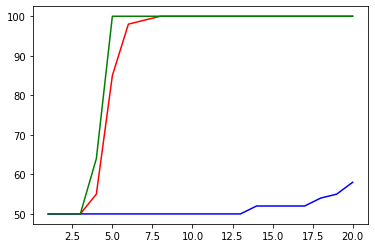

In [298]:
for _ in range(10):
  Prediction0 = [g(F(model0, x)) for x,_ in data0]
  YypX = list(zip(CAT0, Prediction0, X0))
  deltaX0 = -2*sum( [(r-y)*y*(1-y)*x[0] for r,y,x in YypX] )
  deltaX1 = -2*sum( [(r-y)*y*(1-y)*x[1] for r,y,x in YypX] )
  deltaX2 = -2*sum( [(r-y)*y*(1-y)*x[2] for r,y,x in YypX] )
  deltaX3 = -2*sum( [(r-y)*y*(1-y)*x[3] for r,y,x in YypX] )
  deltaX4 = -2*sum( [(r-y)*y*(1-y)*x[4] for r,y,x in YypX] )
  model0 = [model0[0]-(alpha*deltaX0), model0[1]-(alpha*deltaX1), model0[2]-(alpha*deltaX2), model0[4]-(alpha*deltaX3), model0[4]-(alpha*deltaX4)]
  
  Prediction1 = [g(F(model1, x)) for x,_ in data1]
  YypX = list(zip(CAT1, Prediction1, X1))
  deltaX0 = -2*sum( [(r-y)*y*(1-y)*x[0] for r,y,x in YypX] )
  deltaX1 = -2*sum( [(r-y)*y*(1-y)*x[1] for r,y,x in YypX] )
  deltaX2 = -2*sum( [(r-y)*y*(1-y)*x[2] for r,y,x in YypX] )
  deltaX3 = -2*sum( [(r-y)*y*(1-y)*x[3] for r,y,x in YypX] )
  deltaX4 = -2*sum( [(r-y)*y*(1-y)*x[4] for r,y,x in YypX] )
  model1 = [model1[0]-(alpha*deltaX0), model1[1]-(alpha*deltaX1), model1[2]-(alpha*deltaX2), model1[3]-(alpha*deltaX3), model1[4]-(alpha*deltaX4)]
  
  Prediction2 = [g(F(model2, x)) for x,_ in data2]
  YypX = list(zip(CAT2, Prediction2, X2))
  deltaX0 = -2*sum( [(r-y)*y*(1-y)*x[0] for r,y,x in YypX] )
  deltaX1 = -2*sum( [(r-y)*y*(1-y)*x[1] for r,y,x in YypX] )
  deltaX2 = -2*sum( [(r-y)*y*(1-y)*x[2] for r,y,x in YypX] )
  deltaX3 = -2*sum( [(r-y)*y*(1-y)*x[3] for r,y,x in YypX] )
  deltaX4 = -2*sum( [(r-y)*y*(1-y)*x[4] for r,y,x in YypX] )
  model2 = [model2[0]-(alpha*deltaX0), model2[1]-(alpha*deltaX1), model2[2]-(alpha*deltaX2), model2[3]-(alpha*deltaX3), model2[4]-(alpha*deltaX4)]
  
  iteration+=1
  accuracy0.append((len([x for x,y  in zip(Prediction0,CAT0) if (k(x)==y)])))
  accuracy1.append((len([x for x,y  in zip(Prediction1,CAT1) if (k(x)==y)])))
  accuracy2.append((len([x for x,y  in zip(Prediction2,CAT2) if (k(x)==y)])))
  iterations.append(iteration)




plt.plot(iterations, accuracy0, "red")  #Number of correct classifications of setosa vs. versicolor
plt.plot(iterations, accuracy1, "blue") #Number of correct classifications of virginica vs. versicolor
plt.plot(iterations, accuracy2, "green")#Number of correct classifications of setosa vs. virginica

print("Iteration: ",iteration)
print("Number of points correctly classified:",(len([x for x,y  in zip(Prediction0,CAT0) if (k(x)==y)])))
print("Number of points correctly classified:",(len([x for x,y  in zip(Prediction1,CAT1) if (k(x)==y)])))
print("Number of points correctly classified:",(len([x for x,y  in zip(Prediction2,CAT2) if (k(x)==y)])))

In [ ]:
print (iteration)
plt.show()

Next here I 've implemented both the Squared Error derived gradient and the Cross-Entropy derived gradientm(or attempted to at least.) My implementation od Cross-Entropy seems to always produce a line that is skewed from where it ought to be.

In [323]:
TrainingData = [((1, 0, 0), 1), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 1), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 0), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

In [206]:
TrainingData = [((1, 0, 0), 0), ((1, 1, 7), 0), ((1, -3, -2), 0), ((1, 8, 9), 1), ((1, 4, 3), 1), ((1, 5, -2), 1), ((1, 0, 0), 0), ((1, 6, 9), 1), ((1, 4, 2), 1), ((1, 1, -9), 1), ((1, -7, 7), 0), ((1, 0, -1), 1), ((1, 9, -4), 1), ((1, 1, 0), 1), ((1, -2, -5), 1), ((1, 2, 3), 1), ((1, -7, 2), 0), ((1, -3, 0), 0), ((1, 5, 0), 1), ((1, 0, -3), 1), ((1, -2, 3), 0), ((1, 9, 6), 1), ((1, 0, -8), 1), ((1, 0, 2), 1), ((1, -8, 6), 0), ((1, 1, 9), 0), ((1, 0, 5), 0), ((1, -4, 9), 0), ((1, 8, 2), 1), ((1, 2, 6), 0)]

In [279]:
TrainingData = [((1, 2, 7), 0), ((1, 19, 72), 0), ((1, -39, -20), 0), ((1, 86, 95), 1), ((1, 45, 37), 1), ((1, 52, -23), 1), ((1, -8, -8), 0), ((1, 67, 93), 1), ((1, 46, 21), 1), ((1, 18, -97), 1), ((1, -78, 70), 0), ((1, -9, -17), 1), ((1, 94, -40), 1), ((1, 11, -3), 1), ((1, -24, -59), 1), ((1, 25, 33), 1), ((1, -71, 23), 0), ((1, -34, -7), 0), ((1, 55, -3), 1), ((1, -5, -33), 1), ((1, -22, 38), 0), ((1, 94, 66), 1), ((1, 4, -89), 1), ((1, -9, 26), 0), ((1, -83, 61), 0), ((1, 19, 98), 0), ((1, -1, 55), 0), ((1, -43, 90), 0), ((1, 86, 27), 1), ((1, 24, 69), 0)]

In [324]:
Weights = [.001, .001, .001]
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
g = lambda y :1/(1+ np.exp(math.e*-y))
def k(x):
    if (x>.5):
      return(1)
    else:
      return (0)

In [325]:
X0 = [d for d,_ in TrainingData]
Y0 = [(d[2]) for d,_ in TrainingData]
CAT0 = [x for _,x in TrainingData]
model0 = [0.0001, 0.0001, 0.0001] 
Prediction0 = [g(F(model0, x)) for x,_ in TrainingData]

X1 = [d for d,_ in TrainingData]
Y1 = [(d[2]) for d,_ in TrainingData]
CAT1 = [x for _,x in TrainingData]
model1 = [0.0001, 0.0001, 0.0001] 
Prediction1 = [g(F(model1, x)) for x,_ in TrainingData]
alpha = .000001
iteration = 0
deltaX0s = []
deltaX1s = []
accuracy0 = []
accuracy1 = []

I'm still doing some bug hunting here. My accuracy evaluater is breaking here for some reason. The graph still allow visual confirmation though.

[0.38561168339609775, 2.3896073945989302]
[0.2313611545974339, 2.00926105730369]


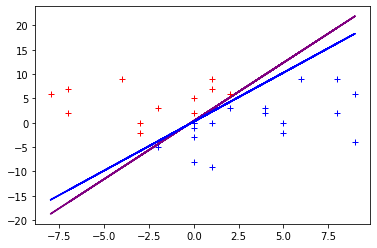

Iteration:  39
Number of points correctly classified: 18
Number of points correctly classified: 18
[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18]


In [337]:
for _ in range(10):
  Prediction0 = [g(F(model0, x)) for x,_ in data0]
  YypX = list(zip(CAT0, Prediction0, X0))
  deltaX0 = -2*sum( [(r-y)*y*(1-y)*x[0] for r,y,x in YypX] )
  deltaX1 = -2*sum( [(r-y)*y*(1-y)*x[1] for r,y,x in YypX] )
  deltaX2 = -2*sum( [(r-y)*y*(1-y)*x[2] for r,y,x in YypX] )
  model0 = [model0[0]-(alpha*deltaX0), model0[1]-(alpha*deltaX1), model0[2]-(alpha*deltaX2)]
  
  Prediction1 = [g(F(model1, x)) for x,_ in data1] 
  YypX = list(zip(CAT1, Prediction1, X1))
  deltaX0 = -sum( [(r-y)*x[0] for r,y,x in YypX] )
  deltaX1 = -sum( [(r-y)*x[1] for r,y,x in YypX] )
  deltaX2 = -sum( [(r-y)*x[2] for r,y,x in YypX] )
  model1 = [model1[0]-(alpha*deltaX0), model1[1]-(alpha*deltaX1), model1[2]-(alpha*deltaX2)]
  iteration+=1

Line0 = [-model0[0]/model0[2],-model0[1]/model0[2]] 
LineYs0 = [(F(Line0, [x[0],x[1]])) for x,_ in TrainingData]
plt.plot([x[1] for x in  X0], LineYs0, "purple")
print (Line0)

Line1 = [-model1[0]/model1[2],-model1[1]/model1[2]] 
LineYs1 = [(F(Line1, [x[0],x[1]])) for x,_ in TrainingData]
plt.plot([x[1] for x in  X1], LineYs1, "blue")
print (Line1)

foo = [(d[1]) for d,_ in (x for x in TrainingData if ((x[1])==0))]
bar = [(y[2]) for y,_ in (x for x in TrainingData if ((x[1])==0))]
plt.plot(foo, bar,"r+")

foo1 = [(d[1]) for d,_ in (x for x in TrainingData if ((x[1])==1))]
bar1 = [(y[2]) for y,_ in (x for x in TrainingData if ((x[1])==1))]
plt.plot(foo1, bar1,"b+")
plt.show()


accuracy0.append((len([x for x,y  in zip(Prediction0,CAT0) if (k(x)==y)])))
accuracy1.append((len([x for x,y  in zip(Prediction1,CAT1) if (k(x)==y)])))
iterations.append(iteration)




#plt.plot(iterations, accuracy0, "red")  #Number of correct classifications of setosa vs. versicolor
#plt.plot(iterations, accuracy1, "blue") #Number of correct classifications of virginica vs. versicolor


print("Iteration: ",iteration)
print("Number of points correctly classified:",(len([x for x,y  in zip(Prediction0,CAT0) if (k(x)==y)])))
print("Number of points correctly classified:",(len([x for x,y  in zip(Prediction1,CAT1) if (k(x)==y)])))
print(accuracy0)

Next up: Linear Regression! You know it, you love it, you miss the good old days when math made sense.


In [338]:
Weights = [5, 2]
F = lambda W, X: sum([w*x for w,x in zip(W,X)])
dataX1 = range(-2, 11, 1)
dataX0 = [1]*len(dataX1)
data = list(zip(dataX0, dataX1))
Y = [F(Weights, X) for X in data]

In [339]:

TrainingData = [((1, -2), 1), ((1, -1), 3), ((1, 0), 5), ((1, 1), 7), ((1, 2), 9), ((1, 3), 11), ((1, 4), 13), ((1, 5), 15), ((1, 6), 17), ((1, 7), 19), ((1, 8), 21), ((1, 9), 23), ((1, 10), 25)]

In [343]:
TrainingData = [((1, -2), 6.39), ((1, -1), 16.51), ((1, 0), -3.11), ((1, 1), 10.79), ((1, 2), 11.62), ((1, 3), 23.24), ((1, 4), 18.27), ((1, 5), 27.58), ((1, 6), 22.21), ((1, 7), 5.12), ((1, 8), 8.86), ((1, 9), 10.69), ((1, 10), 14.82)]

In [370]:
data = TrainingData
X = [(d[0], d[1]) for d,_ in data]
Y = [y for _, y in data]
alpha=0.003
model=[0, 0, 0, 0]
iteration = 0
ErrorData = []
AvgDeviation = []
yPredicted = [F(model, x) for x in X]
Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
AvgDeviation.append(sum([(r-y) for r,y in zip(Y, yPredicted)])/len(Y))





Iteration:  5 Error= 1875.8791903381293
[0.324050307315637, 1.2278911404413304]


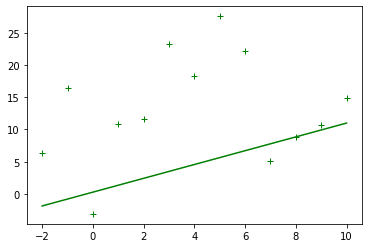

Error over iteration:


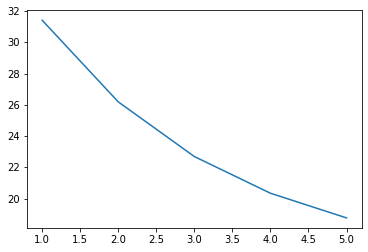

Average deviation from line: 8.747049609572318


In [375]:
for _ in range(1):
  yPredicted = [F(model, x) for x in X]
  Error = sum([(r-y)**2.0 for r,y in zip(Y, yPredicted)])
  AvgDeviation.append(sum([(r-y) for r,y in zip(Y, yPredicted)])/len(Y))
  YypX = list(zip(Y, yPredicted, X))
  deltaX0 = 1/len(Y)*sum( [(-2*(r-y)*x[0]) for r,y,x in YypX] )
  deltaX1 = 1/len(Y)*sum( [(-2*(r-y)*x[1]) for r,y,x in YypX] )
  model = [model[0]-alpha*deltaX0, model[1]-alpha*deltaX1]
  iteration += 1
  ErrorData.append([Error,iteration])
print("Iteration: ", iteration, "Error=", Error)
print(model)
plt.plot(dataX1, yPredicted, "g")
plt.plot(dataX1, Y, "g+")
plt.show()
print("Error over iteration:")
plt.plot([x for _,x in ErrorData], [y/100 for y,_ in ErrorData])
plt.show()
print("Average deviation from line:", AvgDeviation[-1])

